In [1]:
import numpy as np

#starting capital
a0 = 100000

#starting subscribers
n0 = 1000

#monthly fee
d = 133

#number of months to check for bankruptcy
T = 120

#average claim amount
F = 38400

#rate one subscriber leaves
c1 = 0.0069
#rate one subscriber joins
c2 = 0.0072
#rate one claim occurs
c3 = 0.0015

#rate at which subscribers leave
mu = n0 * c1
#rate at which subscribers join
nu = n0 * c2
#rate at which claims occur
lam = n0 * c3

In [2]:
def R(a,n,d,T,F,mu,nu,lam):
    success = 1
    
    for i in range(T):
        #update rates based on number of subscribers
        mu = n*c1
        nu = n*c2
        lam = n*c3
        
        #randomly generate joining/leaving subscribers
        num_join = np.random.poisson(nu)
        num_leave = np.random.exponential(1/mu)
        
        #update total subscribers
        n = n + num_join - num_leave
        
        #randomly generate number of crashes
        num_crashes = np.random.poisson(lam)
        
        #calculate total damage
        damage_total = 0
        for i in range(num_crashes):
            damage_total += F
        
        #update capital available
        a = a + n*d - damage_total
        
        #make sure not negative number of subscribers
        if n < 0:
            n = 0
        
        if a < 0:
            success = 0
            break
    
    return(success)

print(R(a0,n0,d,T,F,mu,nu,lam))

1


In [3]:
def runTrials(num):
    
    S=0
    for k in range (num):
        Y=R(a0,n0,d,T,F,mu,nu,lam)
        S=S+Y
    return S

num = 100
S = runTrials(num)
print(S)
print(S/num)

100
1.0


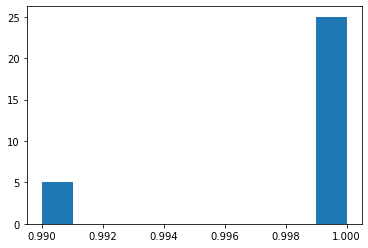

In [4]:
import matplotlib.pyplot as plt
x=np.zeros(30)
num = 100

for j in range (30):
    S=0
    x[j]=runTrials(num)/num

plt.hist(x, bins=10)
plt.show()